In [ ]:
import torch
import numpy
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
names = pd.read_csv("https://raw.githubusercontent.com/karpathy/makemore/refs/heads/master/names.txt")
names = names.values
names = names.reshape(1,-1).squeeze()
names

array(['olivia', 'ava', 'isabella', ..., 'zyrie', 'zyron', 'zzyzx'],
      shape=(32032,), dtype=object)

In [5]:
chars = sorted(list(set("".join(names))))

stoi = {s: i+1 for i, s in enumerate(chars)}
stoi["."] = 0

itos = {i: s for s,i in stoi.items()}


In [6]:
BLOCK_SIZE = 3

X, y = [], []

for name in names[:5]:
    context  = [0] * BLOCK_SIZE
    for letter in name + ".":
        ix = stoi[letter]

        X.append(context)
        y.append(ix)

        context = context[1:] + [ix]

X = torch.tensor(X)
y = torch.tensor(y)

In [7]:
for features, targ in zip(X,y):
    print(features, targ)
    break

tensor([0, 0, 0]) tensor(15)


In [8]:
X.shape

torch.Size([37, 3])

In [9]:
C = torch.randn((27, 2))
emb = C[X]
emb

tensor([[[ 0.5373,  0.1638],
         [ 0.5373,  0.1638],
         [ 0.5373,  0.1638]],

        [[ 0.5373,  0.1638],
         [ 0.5373,  0.1638],
         [-1.0412,  0.3997]],

        [[ 0.5373,  0.1638],
         [-1.0412,  0.3997],
         [ 1.0391, -0.2270]],

        [[-1.0412,  0.3997],
         [ 1.0391, -0.2270],
         [-2.0012, -1.5313]],

        [[ 1.0391, -0.2270],
         [-2.0012, -1.5313],
         [ 1.4280,  0.5085]],

        [[-2.0012, -1.5313],
         [ 1.4280,  0.5085],
         [-2.0012, -1.5313]],

        [[ 1.4280,  0.5085],
         [-2.0012, -1.5313],
         [ 1.1633, -1.0655]],

        [[ 0.5373,  0.1638],
         [ 0.5373,  0.1638],
         [ 0.5373,  0.1638]],

        [[ 0.5373,  0.1638],
         [ 0.5373,  0.1638],
         [ 1.1633, -1.0655]],

        [[ 0.5373,  0.1638],
         [ 1.1633, -1.0655],
         [ 1.4280,  0.5085]],

        [[ 1.1633, -1.0655],
         [ 1.4280,  0.5085],
         [ 1.1633, -1.0655]],

        [[ 0.5373,  0

In [10]:
emb.shape

torch.Size([37, 3, 2])

In [11]:
C[[0,0,0]]

tensor([[0.5373, 0.1638],
        [0.5373, 0.1638],
        [0.5373, 0.1638]])

In [12]:
torch.concat([emb[:,0,:], emb[:,1,:], emb[:,2,:]], dim=1)

tensor([[ 0.5373,  0.1638,  0.5373,  0.1638,  0.5373,  0.1638],
        [ 0.5373,  0.1638,  0.5373,  0.1638, -1.0412,  0.3997],
        [ 0.5373,  0.1638, -1.0412,  0.3997,  1.0391, -0.2270],
        [-1.0412,  0.3997,  1.0391, -0.2270, -2.0012, -1.5313],
        [ 1.0391, -0.2270, -2.0012, -1.5313,  1.4280,  0.5085],
        [-2.0012, -1.5313,  1.4280,  0.5085, -2.0012, -1.5313],
        [ 1.4280,  0.5085, -2.0012, -1.5313,  1.1633, -1.0655],
        [ 0.5373,  0.1638,  0.5373,  0.1638,  0.5373,  0.1638],
        [ 0.5373,  0.1638,  0.5373,  0.1638,  1.1633, -1.0655],
        [ 0.5373,  0.1638,  1.1633, -1.0655,  1.4280,  0.5085],
        [ 1.1633, -1.0655,  1.4280,  0.5085,  1.1633, -1.0655],
        [ 0.5373,  0.1638,  0.5373,  0.1638,  0.5373,  0.1638],
        [ 0.5373,  0.1638,  0.5373,  0.1638, -2.0012, -1.5313],
        [ 0.5373,  0.1638, -2.0012, -1.5313,  0.9157, -0.8858],
        [-2.0012, -1.5313,  0.9157, -0.8858,  1.1633, -1.0655],
        [ 0.9157, -0.8858,  1.1633, -1.0

In [13]:
emb[:,0,:], emb[:,1,:], emb[:,2,:]

(tensor([[ 0.5373,  0.1638],
         [ 0.5373,  0.1638],
         [ 0.5373,  0.1638],
         [-1.0412,  0.3997],
         [ 1.0391, -0.2270],
         [-2.0012, -1.5313],
         [ 1.4280,  0.5085],
         [ 0.5373,  0.1638],
         [ 0.5373,  0.1638],
         [ 0.5373,  0.1638],
         [ 1.1633, -1.0655],
         [ 0.5373,  0.1638],
         [ 0.5373,  0.1638],
         [ 0.5373,  0.1638],
         [-2.0012, -1.5313],
         [ 0.9157, -0.8858],
         [ 1.1633, -1.0655],
         [-0.3440, -0.2869],
         [ 0.1086,  0.6985],
         [ 1.0391, -0.2270],
         [ 0.5373,  0.1638],
         [ 0.5373,  0.1638],
         [ 0.5373,  0.1638],
         [ 0.9157, -0.8858],
         [-1.0412,  0.3997],
         [-1.3822,  0.3807],
         [-0.4950, -2.0579],
         [ 0.5373,  0.1638],
         [ 0.5373,  0.1638],
         [ 0.5373,  0.1638],
         [-0.9330,  0.1485],
         [-0.4950, -2.0579],
         [ 1.1633, -1.0655],
         [ 0.7318,  0.6049],
         [ 1.0

In [14]:
torch.concat(torch.unbind(emb,1), dim=1)


tensor([[ 0.5373,  0.1638,  0.5373,  0.1638,  0.5373,  0.1638],
        [ 0.5373,  0.1638,  0.5373,  0.1638, -1.0412,  0.3997],
        [ 0.5373,  0.1638, -1.0412,  0.3997,  1.0391, -0.2270],
        [-1.0412,  0.3997,  1.0391, -0.2270, -2.0012, -1.5313],
        [ 1.0391, -0.2270, -2.0012, -1.5313,  1.4280,  0.5085],
        [-2.0012, -1.5313,  1.4280,  0.5085, -2.0012, -1.5313],
        [ 1.4280,  0.5085, -2.0012, -1.5313,  1.1633, -1.0655],
        [ 0.5373,  0.1638,  0.5373,  0.1638,  0.5373,  0.1638],
        [ 0.5373,  0.1638,  0.5373,  0.1638,  1.1633, -1.0655],
        [ 0.5373,  0.1638,  1.1633, -1.0655,  1.4280,  0.5085],
        [ 1.1633, -1.0655,  1.4280,  0.5085,  1.1633, -1.0655],
        [ 0.5373,  0.1638,  0.5373,  0.1638,  0.5373,  0.1638],
        [ 0.5373,  0.1638,  0.5373,  0.1638, -2.0012, -1.5313],
        [ 0.5373,  0.1638, -2.0012, -1.5313,  0.9157, -0.8858],
        [-2.0012, -1.5313,  0.9157, -0.8858,  1.1633, -1.0655],
        [ 0.9157, -0.8858,  1.1633, -1.0

In [15]:
emb_viewed = emb.view(-1, 6)
emb_viewed

tensor([[ 0.5373,  0.1638,  0.5373,  0.1638,  0.5373,  0.1638],
        [ 0.5373,  0.1638,  0.5373,  0.1638, -1.0412,  0.3997],
        [ 0.5373,  0.1638, -1.0412,  0.3997,  1.0391, -0.2270],
        [-1.0412,  0.3997,  1.0391, -0.2270, -2.0012, -1.5313],
        [ 1.0391, -0.2270, -2.0012, -1.5313,  1.4280,  0.5085],
        [-2.0012, -1.5313,  1.4280,  0.5085, -2.0012, -1.5313],
        [ 1.4280,  0.5085, -2.0012, -1.5313,  1.1633, -1.0655],
        [ 0.5373,  0.1638,  0.5373,  0.1638,  0.5373,  0.1638],
        [ 0.5373,  0.1638,  0.5373,  0.1638,  1.1633, -1.0655],
        [ 0.5373,  0.1638,  1.1633, -1.0655,  1.4280,  0.5085],
        [ 1.1633, -1.0655,  1.4280,  0.5085,  1.1633, -1.0655],
        [ 0.5373,  0.1638,  0.5373,  0.1638,  0.5373,  0.1638],
        [ 0.5373,  0.1638,  0.5373,  0.1638, -2.0012, -1.5313],
        [ 0.5373,  0.1638, -2.0012, -1.5313,  0.9157, -0.8858],
        [-2.0012, -1.5313,  0.9157, -0.8858,  1.1633, -1.0655],
        [ 0.9157, -0.8858,  1.1633, -1.0

In [16]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

W2 = torch.randn((100, 27))
b2 = torch.randn(27)

layer1 = torch.tanh(emb_viewed @ W1 + b1)
logits = torch.tanh(layer1 @ W2 + b2)
logits.shape

torch.Size([37, 27])

In [17]:
counts = logits.exp()
probs = counts / counts.sum(1, keepdim=True)
probs

tensor([[0.0118, 0.0663, 0.0663, 0.0090, 0.0663, 0.0090, 0.0090, 0.0663, 0.0090,
         0.0663, 0.0627, 0.0093, 0.0663, 0.0663, 0.0103, 0.0663, 0.0090, 0.0090,
         0.0090, 0.0663, 0.0662, 0.0090, 0.0198, 0.0132, 0.0090, 0.0662, 0.0630],
        [0.0153, 0.0212, 0.0862, 0.0862, 0.0118, 0.0117, 0.0859, 0.0117, 0.0117,
         0.0862, 0.0862, 0.0117, 0.0118, 0.0117, 0.0117, 0.0862, 0.0117, 0.0117,
         0.0120, 0.0862, 0.0862, 0.0117, 0.0117, 0.0117, 0.0117, 0.0862, 0.0121],
        [0.0084, 0.0539, 0.0620, 0.0084, 0.0620, 0.0620, 0.0084, 0.0620, 0.0612,
         0.0084, 0.0591, 0.0601, 0.0088, 0.0620, 0.0620, 0.0429, 0.0620, 0.0084,
         0.0084, 0.0620, 0.0084, 0.0084, 0.0084, 0.0620, 0.0084, 0.0620, 0.0101],
        [0.0801, 0.0777, 0.0109, 0.0806, 0.0109, 0.0764, 0.0806, 0.0109, 0.0109,
         0.0806, 0.0109, 0.0296, 0.0109, 0.0109, 0.0109, 0.0806, 0.0109, 0.0227,
         0.0163, 0.0111, 0.0806, 0.0604, 0.0109, 0.0109, 0.0110, 0.0109, 0.0806],
        [0.0089, 0.0642,

In [18]:
probs[0]

tensor([0.0118, 0.0663, 0.0663, 0.0090, 0.0663, 0.0090, 0.0090, 0.0663, 0.0090,
        0.0663, 0.0627, 0.0093, 0.0663, 0.0663, 0.0103, 0.0663, 0.0090, 0.0090,
        0.0090, 0.0663, 0.0662, 0.0090, 0.0198, 0.0132, 0.0090, 0.0662, 0.0630])

In [19]:
loss = -probs[torch.arange(32), y[:32]].log().mean()
loss

tensor(3.5716)

In [20]:
y

tensor([15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,  1,  2,  5, 12, 12,
         1,  0, 19, 15, 16,  8,  9,  1,  0,  3,  8,  1, 18, 12, 15, 20, 20,  5,
         0])

In [21]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):  
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(names)
n1 = int(0.8*len(names))
n2 = int(0.9*len(names))

X_train, y_train = build_dataset(names[:n1])
X_val, y_val = build_dataset(names[n1:n2])
X_test, y_test = build_dataset(names[n2:])


torch.Size([182436, 3]) torch.Size([182436])
torch.Size([22844, 3]) torch.Size([22844])
torch.Size([22861, 3]) torch.Size([22861])


In [22]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
  p.requires_grad = True

In [23]:
lri = []
lossi = []
stepi = []

In [24]:
import torch.nn.functional as F


def train_step(X,y, C,W1,W2,b1,b2, parameters, lr=0.1):  
  # minibatch construct
  ix = torch.randint(0, X.shape[0], (32,))

  # forward pass
  emb = C[X[ix]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1, emb.shape[1]*emb.shape[2]) @ W1 + b1) # (32, 200)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, y[ix])
  #print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  #lr = lrs[i]
  for p in parameters:
    p.data += -lr * p.grad

  return loss.item()


In [25]:

epochi = []
lossi = []

for i in range(1000):
  loss_curr = train_step(X, y,C, W1,W2,b1,b2, parameters)
  epochi.append(i)
  lossi.append(loss_curr)

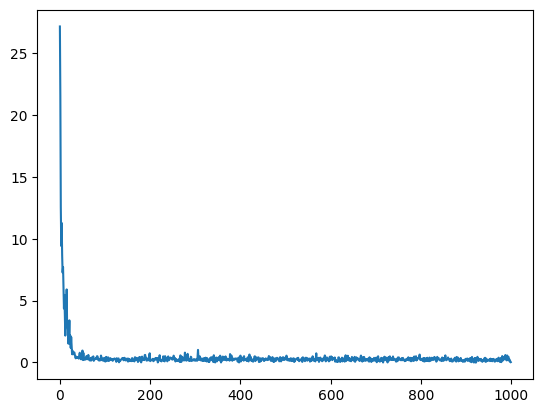

In [26]:
plt.plot(epochi, lossi)

In [27]:
lre = torch.linspace(-3,1,10000)
lrs = 10** lre

lri = []
lossi = []


In [28]:

for i in range(10000):
    # minibatch construct
    ix = torch.randint(0, X_train.shape[0], (32,))

    # forward pass
    emb = C[X_train[ix]] # (32, 3, 10)
    h = torch.tanh(emb.view(-1, emb.shape[1]*emb.shape[2]) @ W1 + b1) # (32, 200)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, y_train[ix])
    #print(loss.item())

    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    lr = lrs[i]
    for p in parameters:
        p.data += -lr * p.grad

    lri.append(lre[i])
    lossi.append(loss.item())

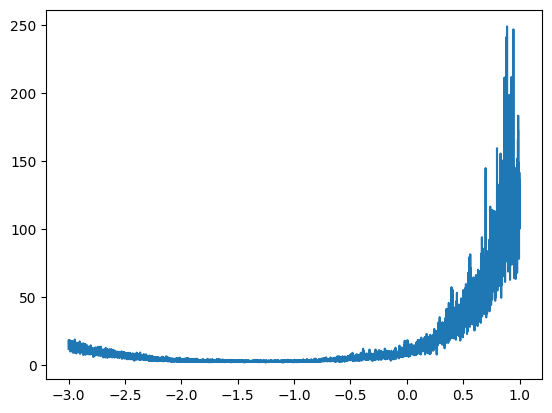

In [29]:
plt.plot(lri, lossi)

In [30]:
lossi_test = []
lossi_train = []
epochi = []

In [31]:

def test_step(X,y,C,W1,W2,b1,b2):
    
     # forward pass
    with torch.no_grad():
        emb = C[X] # (x, 3, 10)
        h = torch.tanh(emb.view(-1, emb.shape[1]*emb.shape[2]) @ W1 + b1) # (x, 200)
        logits = h @ W2 + b2 # (x, 27)
        loss = F.cross_entropy(logits, y)
        return loss.item()



In [32]:

for i in range(3000):
    loss_train = train_step(X_train,y_train,C,W1,W2,b1,b2, parameters, lr=0.3)
    loss_test = test_step(X_test,y_test,C,W1,W2,b1,b2)

    try:
        epochi.append(epochi[-1]+1)
    except:
        epochi.append(0)
    finally:
        lossi_train.append(loss_train)
        lossi_test.append(loss_test)

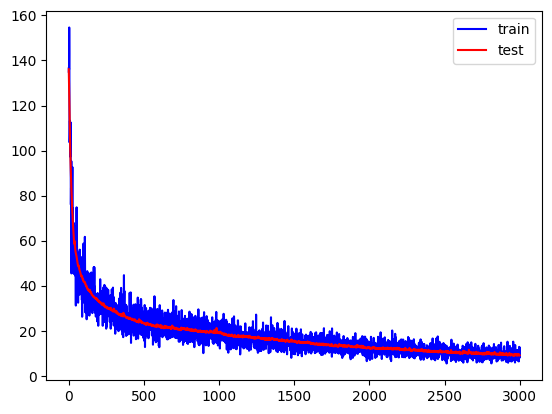

In [33]:
plt.plot(epochi, lossi_train, c="blue", label="train")
plt.plot(epochi, lossi_test, c="red", label="test")
plt.legend()
plt.show()

In [34]:
for i in range(3000):
  loss_curr = train_step(X, y,C, W1,W2,b1,b2, parameters)

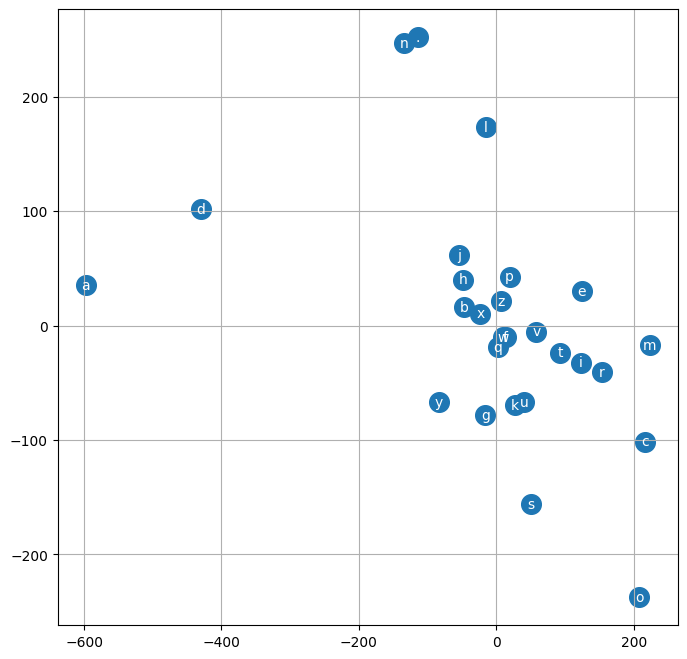

In [35]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [36]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
  p.requires_grad = True

In [37]:
lossi_train = []
lossi_test = []
epochi = []

In [38]:
for i in range(3000):
    loss_train = train_step(X_train,y_train,C,W1,W2,b1,b2, parameters, lr=0.3)
    loss_test = test_step(X_test,y_test,C,W1,W2,b1,b2)

    epochi.append(i)
    lossi_train.append(loss_train)
    lossi_test.append(loss_test)

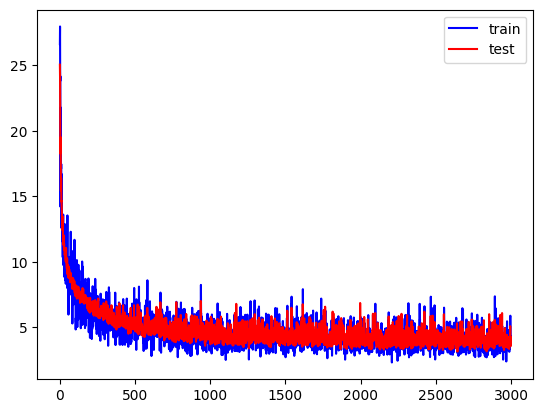

In [39]:
plt.plot(epochi, lossi_train, c="blue", label="train")
plt.plot(epochi, lossi_test, c="red", label="test")
plt.legend()
plt.show()

In [40]:
for _ in range(3000):
    train_step(X_train, y_train, C, W1, W2, b1, b2, parameters, lr=0.3)

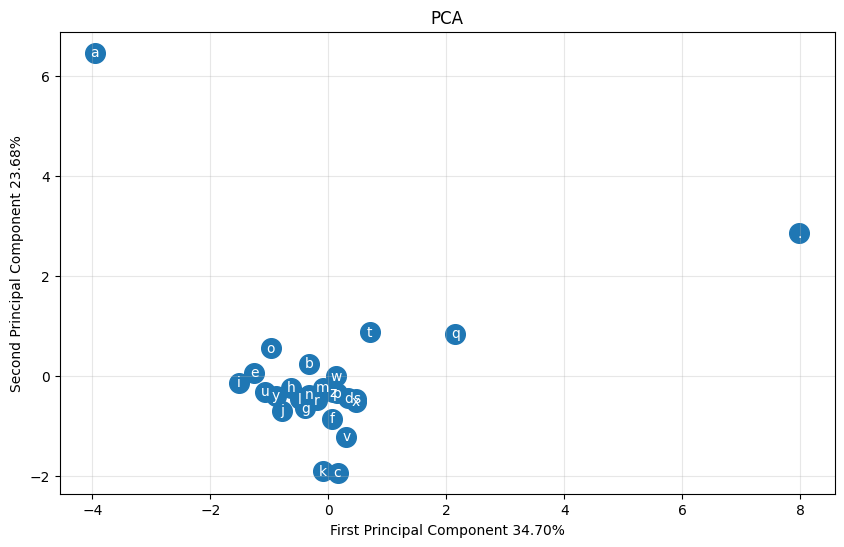

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

colors = ["red","blue","green","yellow"]

# First standardize the features since PCA is sensitive to scale
scaler = StandardScaler()
# Exclude cluster column and any non-numeric columns
X_scaled = scaler.fit_transform(C.detach().numpy())

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Create visualization
plt.figure(figsize=(10, 6))

plt.scatter(
        X_pca[:, 0], 
        X_pca[:, 1],
        # c=colors[cluster_id],
        # label=f'Cluster {cluster_id}',
        # alpha=0.6
        s=200
        
    )

for i in range(X_pca.shape[0]):
    plt.text(X_pca[i,0].item(), X_pca[i,1].item(), itos[i], ha="center", va="center", color='white')

# Add labels and title
plt.xlabel(f'First Principal Component {pca.explained_variance_ratio_[0]*100:.2f}%')
plt.ylabel(f'Second Principal Component {pca.explained_variance_ratio_[1]*100:.2f}%')
plt.title('PCA')
plt.grid(True, alpha=0.3)

plt.show()


In [42]:
g = torch.Generator().manual_seed(42)

for _ in range(20):
    out = []
    context = [0] * BLOCK_SIZE
    while True:
        emb = C[torch.tensor([context])] # (1, 3, 10)
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break
    print("".join(itos[num] for num in out))
    


komeelyn.
komtyn.
kumile.
kintyn.
limy.
koof.
khole.
kontelynn.
kontelyn.
kimmy.
kondel.
kolle.
komtlynn.
kci.
kine.
comlyn.
kimbelleel.
mimotte.
kily.
kimmelynn.


In [43]:
block_size = 3
vocab_size = 27
n_ebmd = 10
n_hidden = 200

g = torch.Generator().manual_seed(42)

C = torch.randn(vocab_size, n_ebmd, generator=g)
W1 = torch.randn(n_ebmd * block_size, n_hidden, generator=g) * (5/3)/((n_ebmd * block_size))
b1 = torch.randn(n_hidden, generator=g)* 0.01
W2 = torch.randn(n_hidden, vocab_size, generator=g) * (5/3)/((n_ebmd * block_size))
b = torch.randn(vocab_size, generator=g)* 0.01

parameters = [C, W1, b1, W2, b2]

print(sum(p.nelement() for p in parameters))
for p in parameters:
    p.requires_grad = True


11897


In [44]:
lr = 0.3

for i in range(3000):
    # minibatch construct
    ix = torch.randint(0, X_train.shape[0], (32,))

    # forward pass
    emb = C[X_train[ix]] # (32, 3, 10)
    pre_h = emb.view(-1, emb.shape[1]*emb.shape[2]) @ W1 + b1
    h = torch.tanh(pre_h) # (32, 200)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, y_train[ix])
    #print(loss.item())

    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    for p in parameters:
        p.data += -lr * p.grad
    
    break

    

(array([  4.,   5.,  12.,   7.,   9.,  25.,  31.,  57.,  65.,  80.,  77.,
         83., 102., 119., 146., 175., 190., 188., 205., 212., 214., 243.,
        246., 231., 257., 272., 253., 249., 271., 244., 223., 238., 222.,
        183., 190., 144., 155., 157., 128.,  95.,  76.,  69.,  52.,  49.,
         53.,  35.,  15.,  28.,   9.,   7.]),
 array([-0.82502174, -0.79258156, -0.76014131, -0.72770113, -0.69526088,
        -0.6628207 , -0.63038051, -0.59794033, -0.56550008, -0.53305984,
        -0.50061965, -0.46817946, -0.43573925, -0.40329903, -0.37085885,
        -0.33841863, -0.30597842, -0.27353823, -0.24109799, -0.2086578 ,
        -0.17621756, -0.14377737, -0.11133718, -0.07889694, -0.04645675,
        -0.01401657,  0.01842368,  0.05086386,  0.08330405,  0.11574429,
         0.14818448,  0.18062472,  0.21306491,  0.24550509,  0.27794528,
         0.31038558,  0.34282577,  0.37526596,  0.40770614,  0.44014633,
         0.47258663,  0.50502682,  0.537467  ,  0.56990719,  0.60234737,
 

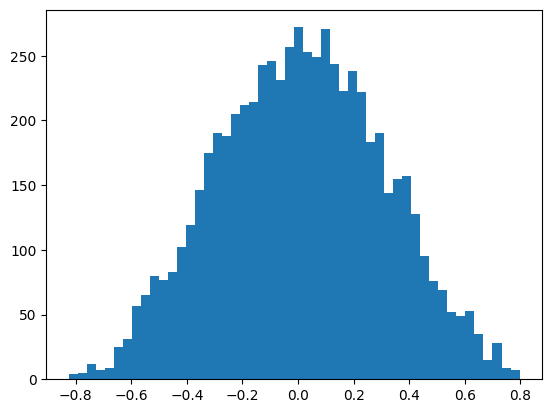

In [45]:
plt.hist(h.detach().view(-1), bins=50)

(array([  4.,   0.,   1.,   4.,   8.,   4.,   7.,   8.,  15.,  27.,  28.,
         59.,  67.,  74.,  86., 119., 130., 166., 211., 237., 253., 289.,
        309., 329., 340., 381., 346., 348., 358., 309., 322., 262., 227.,
        195., 169., 173., 112.,  81.,  82.,  58.,  44.,  33.,  53.,  18.,
         10.,  28.,   2.,   7.,   4.,   3.]),
 array([-1.17234278, -1.12708986, -1.08183694, -1.03658402, -0.99133116,
        -0.94607824, -0.90082532, -0.85557246, -0.81031954, -0.76506662,
        -0.7198137 , -0.67456079, -0.62930787, -0.58405495, -0.53880209,
        -0.49354917, -0.44829625, -0.40304333, -0.35779041, -0.31253755,
        -0.26728463, -0.22203171, -0.17677879, -0.13152587, -0.08627295,
        -0.04102004,  0.00423288,  0.04948568,  0.0947386 ,  0.13999152,
         0.18524444,  0.23049736,  0.27575028,  0.3210032 ,  0.36625612,
         0.41150904,  0.45676196,  0.50201488,  0.54726768,  0.59252059,
         0.63777351,  0.68302643,  0.72827935,  0.77353227,  0.81878519,
 

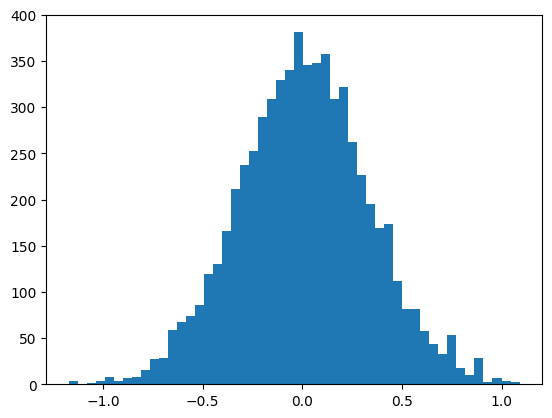

In [46]:
plt.hist(pre_h.detach().view(-1), bins=50)

In [47]:
lossi_train = []
lossi_test = []
epochi = []

In [48]:
for i in range(3000):
    loss_train = train_step(X_train,y_train,C,W1,W2,b1,b2, parameters, lr=0.3)
    loss_test = test_step(X_test,y_test,C,W1,W2,b1,b2)

    epochi.append(i)
    lossi_train.append(loss_train)
    lossi_test.append(loss_test)

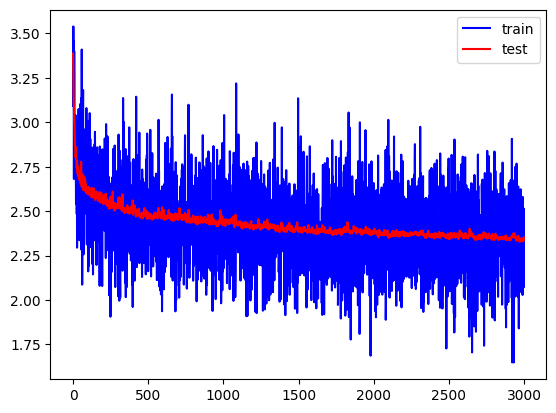

In [49]:
plt.plot(epochi, lossi_train, c="blue", label="train")
plt.plot(epochi, lossi_test, c="red", label="test")
plt.legend()
plt.show()

In [50]:
lossi_test[-1]

2.353377342224121

In [51]:

block_size = 3
vocab_size = 27
n_ebmd = 10
n_hidden = 200

g = torch.Generator().manual_seed(42)

C = torch.randn(vocab_size, n_ebmd, generator=g)
W1 = torch.randn(n_ebmd * block_size, n_hidden, generator=g) * (5/3)/((n_ebmd * block_size))
b1 = torch.randn(n_hidden, generator=g)* 0.01
W2 = torch.randn(n_hidden, vocab_size, generator=g) * (5/3)/((n_hidden))
b = torch.randn(vocab_size, generator=g)* 0.01

parameters = [C, W1, b1, W2, b2]

print(sum(p.nelement() for p in parameters))
for p in parameters:
    p.requires_grad = True


11897


In [52]:
lossi_train = []
lossi_test = []
epochi = []

In [53]:
# import os
# import tempfile
# import mlflow

# # Log model training with MLflow
# with mlflow.start_run():
#     # Log hyperparameters
#     mlflow.log_params({
#         "block_size": block_size,
#         "vocab_size": vocab_size,
#         "n_ebmd": n_ebmd,
#         "n_hidden": n_hidden,
#         "learning_rate": lr,
#         "epochs": 5000
#     })
    
#     # Log final metrics
#     mlflow.log_metric("final_train_loss", lossi_train[-1])
#     mlflow.log_metric("final_test_loss", lossi_test[-1])
#     mlflow.log_metric("best_test_loss", min(lossi_test))
    
#     # Create temporary directory for artifacts
#     with tempfile.TemporaryDirectory() as tmp_dir:
#         torch.save(C, os.path.join(tmp_dir, "embeddings.pt"))
#         torch.save(W1, os.path.join(tmp_dir, "W1.pt"))
#         torch.save(W2, os.path.join(tmp_dir, "W2.pt"))
#         mlflow.log_artifacts(tmp_dir)
    
#     mlflow.set_tag("Model Type", "Makemore Character-Level LM")
#     mlflow.set_tag("Status", "Completed")

In [125]:
block_size = 3
vocab_size = 27
n_ebmd = 10
n_hidden = 200

g = torch.Generator().manual_seed(42)

C = torch.randn(vocab_size, n_ebmd, generator=g)
W1 = torch.randn(n_ebmd * block_size, n_hidden, generator=g) * (5/3)/((n_ebmd * block_size))
# b1 = torch.randn(n_hidden, generator=g)* 0.01
W2 = torch.randn(n_hidden, vocab_size, generator=g)/n_hidden**0.5
b = torch.randn(vocab_size, generator=g)* 0.01

bngain = torch.ones((1, n_hidden))
bnbias = torch.zeros((1, n_hidden))

bnmean_running = torch.zeros((1, n_hidden))
bnstd_running = torch.ones((1, n_hidden))


parameters = [C, W1, W2, b2, bngain, bnbias]

print(sum(p.nelement() for p in parameters))
for p in parameters:
    p.requires_grad = True

12097


In [126]:
lossi_train = []
lossi_test = []
epochi = []

In [127]:
def test_step_with_logging(X, y, C, W1, W2, b1, b2, bngain, bnbias, bnmean_running, bnstd_running):
    with torch.no_grad():
        emb = C[X]
        hpreact = emb.view(-1, emb.shape[1]*emb.shape[2]) @ W1
        hpreact = bngain * (hpreact - bnmean_running) / bnstd_running + bnbias
        h = torch.tanh(hpreact)
        logits = h @ W2 + b2
        
        loss = F.cross_entropy(logits, y)
        return loss.item()

In [128]:
for i in range(5000):
    ix = torch.randint(0, X_train.shape[0], (128,))

    # forward pass
    emb = C[X_train[ix]] # (32, 3, 10)

    hpreact = emb.view(-1, emb.shape[1]*emb.shape[2]) @ W1 #+ b1 #(32, 200)
    bnmeani = hpreact.mean(0, keepdim=True)
    bnstdi = hpreact.std(0, keepdim=True)
    hpreact = bngain * (hpreact - bnmeani)/bnstdi + bnbias

    with torch.no_grad():
        bnmean_running = 0.999 * bnmean_running + 0.001 * bnmeani
        bnstd_running = 0.999 * bnstd_running + 0.001 * bnstdi

    h = torch.tanh(hpreact) # (32, 200)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, y_train[ix])
    #print(loss.item())

    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    #lr = lrs[i]
    for p in parameters:
        p.data += -lr * p.grad

    loss_test = test_step_with_logging(X_test, y_test, C, W1, W2, b1, b2, bngain, bnbias, bnmean_running, bnstd_running)

    epochi.append(i)
    lossi_train.append(loss.item())
    lossi_test.append(loss_test)

In [129]:
with torch.no_grad():
    emb = C[X_test] # (32, 3, 10)
    hpreact = emb.view(-1, emb.shape[1]*emb.shape[2]) @ W1 + b1 #(32, 200)
    hpreact = bngain * (hpreact - bnmean_running)/bnstd_running + bnbias

    h = torch.tanh(hpreact) # (32, 200)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, y_test)
loss

tensor(2.2388)

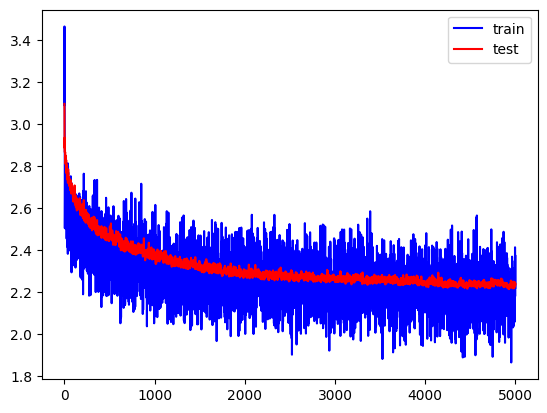

In [130]:
plt.plot(epochi, lossi_train, c="blue", label="train")
plt.plot(epochi, lossi_test, c="red", label="test")
plt.legend()
plt.show()

In [466]:


# Let's train a deeper network
# The classes we create here are the same API as nn.Module in PyTorch

class Linear:
  
  def __init__(self, fan_in, fan_out, bias=True):
    self.weight = torch.randn((fan_in, fan_out), generator=g) / fan_in**0.5
    self.bias = torch.zeros(fan_out) if bias else None
  
  def __call__(self, x):
    self.out = x @ self.weight
    if self.bias is not None:
      self.out += self.bias
    return self.out
  
  def parameters(self):
    return [self.weight] + ([] if self.bias is None else [self.bias])


class BatchNorm1d:
  
  def __init__(self, dim, eps=1e-5, momentum=0.1):
    self.eps = eps
    self.momentum = momentum
    self.training = True
    # parameters (trained with backprop)
    self.gamma = torch.ones(dim)
    self.beta = torch.zeros(dim)
    # buffers (trained with a running 'momentum update')
    self.running_mean = torch.zeros(dim)
    self.running_var = torch.ones(dim)
  
  def __call__(self, x):
    # calculate the forward pass
    if self.training:
      xmean = x.mean(0, keepdim=True) # batch mean
      xvar = x.var(0, keepdim=True) # batch variance
    else:
      xmean = self.running_mean
      xvar = self.running_var
    xhat = (x - xmean) / torch.sqrt(xvar + self.eps) # normalize to unit variance
    self.out = self.gamma * xhat + self.beta
    # update the buffers
    if self.training:
      with torch.no_grad():
        self.running_mean = (1 - self.momentum) * self.running_mean + self.momentum * xmean
        self.running_var = (1 - self.momentum) * self.running_var + self.momentum * xvar
    return self.out
  
  def parameters(self):
    return [self.gamma, self.beta]

class Tanh:
  def __call__(self, x):
    self.out = torch.tanh(x)
    return self.out
  def parameters(self):
    return []

n_embd = 10 # the dimensionality of the character embedding vectors
n_hidden = 100 # the number of neurons in the hidden layer of the MLP
g = torch.Generator().manual_seed(2147483647) # for reproducibility

C = torch.randn((vocab_size, n_embd),            generator=g)
layers = [
  Linear(n_embd * block_size, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
  Linear(           n_hidden, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
  Linear(           n_hidden, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
  Linear(           n_hidden, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
  Linear(           n_hidden, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
  Linear(           n_hidden, vocab_size, bias=False), BatchNorm1d(vocab_size),
]
# layers = [
#   Linear(n_embd * block_size, n_hidden), Tanh(),
#   Linear(           n_hidden, n_hidden), Tanh(),
#   Linear(           n_hidden, n_hidden), Tanh(),
#   Linear(           n_hidden, n_hidden), Tanh(),
#   Linear(           n_hidden, n_hidden), Tanh(),
#   Linear(           n_hidden, vocab_size),
# ]

with torch.no_grad():
  # last layer: make less confident
  layers[-1].gamma *= 0.1
  #layers[-1].weight *= 0.1
  # all other layers: apply gain
  for layer in layers[:-1]:
    if isinstance(layer, Linear):
      layer.weight *= 1 #5/3

parameters = [C] + [p for layer in layers for p in layer.parameters()]
print(sum(p.nelement() for p in parameters)) # number of parameters in total
for p in parameters:
  p.requires_grad = True



47024


In [468]:

# same optimization as last time
max_steps = 50000
batch_size = 32
lossi = []
ud = []

for i in range(max_steps):
  
  # minibatch construct
  ix = torch.randint(0, X_train.shape[0], (batch_size,), generator=g)
  Xb, Yb = X_train[ix], y_train[ix] # batch X,Y
  
  # forward pass
  emb = C[Xb] # embed the characters into vectors
  x = emb.view(emb.shape[0], -1) # concatenate the vectors
  for layer in layers:
    x = layer(x)
  loss = F.cross_entropy(x, Yb) # loss function
  
  # backward pass
  for layer in layers:
    layer.out.retain_grad() # AFTER_DEBUG: would take out retain_graph
  for p in parameters:
    p.grad = None
  loss.backward()
  
  # update
  lr = 0.1# step learning rate decay
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  if i % 10000 == 0: # print every once in a while
    print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
  lossi.append(loss.log10().item())
  with torch.no_grad():
    ud.append([((lr*p.grad).std() / p.data.std()).log10().item() for p in parameters])

  # if i >= 1000:
  #   break # AFTER_DEBUG: would take out obviously to run full optimization



      0/  50000: 2.1277
  10000/  50000: 2.3172
  20000/  50000: 2.6327
  30000/  50000: 2.2184
  40000/  50000: 1.9542


layer 2 (      Tanh): mean +0.00, std 0.71, saturated: 12.53%
layer 5 (      Tanh): mean -0.00, std 0.74, saturated: 14.62%
layer 8 (      Tanh): mean -0.01, std 0.74, saturated: 14.97%
layer 11 (      Tanh): mean -0.01, std 0.74, saturated: 14.56%
layer 14 (      Tanh): mean +0.00, std 0.74, saturated: 13.72%


Text(0.5, 1.0, 'activation distribution')

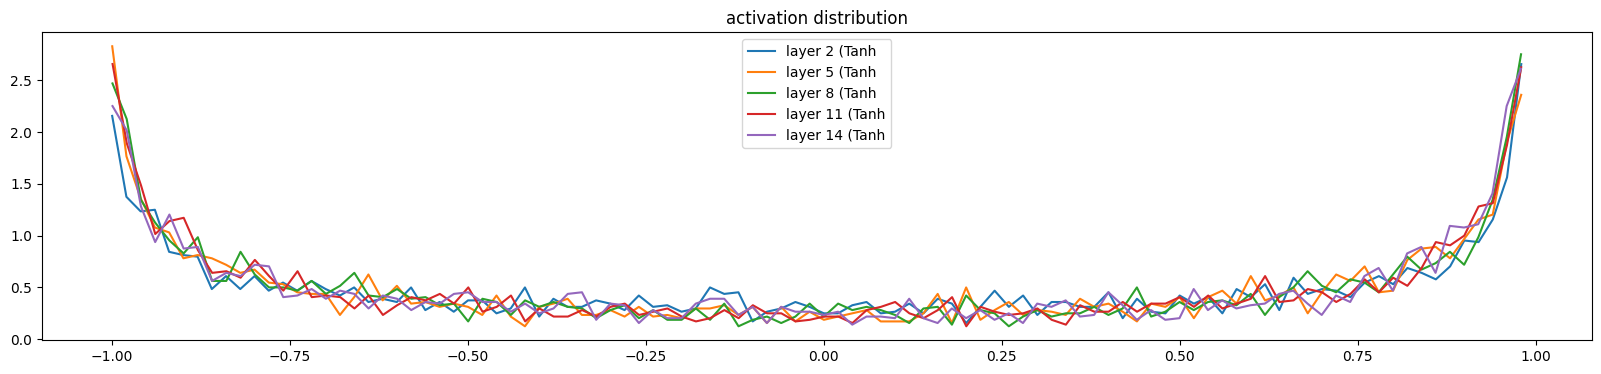

In [469]:


# visualize histograms
plt.figure(figsize=(20, 4)) # width and height of the plot
legends = []
for i, layer in enumerate(layers[:-1]): # note: exclude the output layer
  if isinstance(layer, Tanh):
    t = layer.out
    print('layer %d (%10s): mean %+.2f, std %.2f, saturated: %.2f%%' % (i, layer.__class__.__name__, t.mean(), t.std(), (t.abs() > 0.97).float().mean()*100))
    hy, hx = torch.histogram(t, density=True)
    plt.plot(hx[:-1].detach(), hy.detach())
    legends.append(f'layer {i} ({layer.__class__.__name__}')
plt.legend(legends);
plt.title('activation distribution')


    

layer 2 (      Tanh): mean -0.000000, std 3.639949e-03
layer 5 (      Tanh): mean +0.000000, std 3.782265e-03
layer 8 (      Tanh): mean -0.000000, std 3.707997e-03
layer 11 (      Tanh): mean -0.000000, std 3.361885e-03
layer 14 (      Tanh): mean -0.000000, std 2.949178e-03


Text(0.5, 1.0, 'gradient distribution')

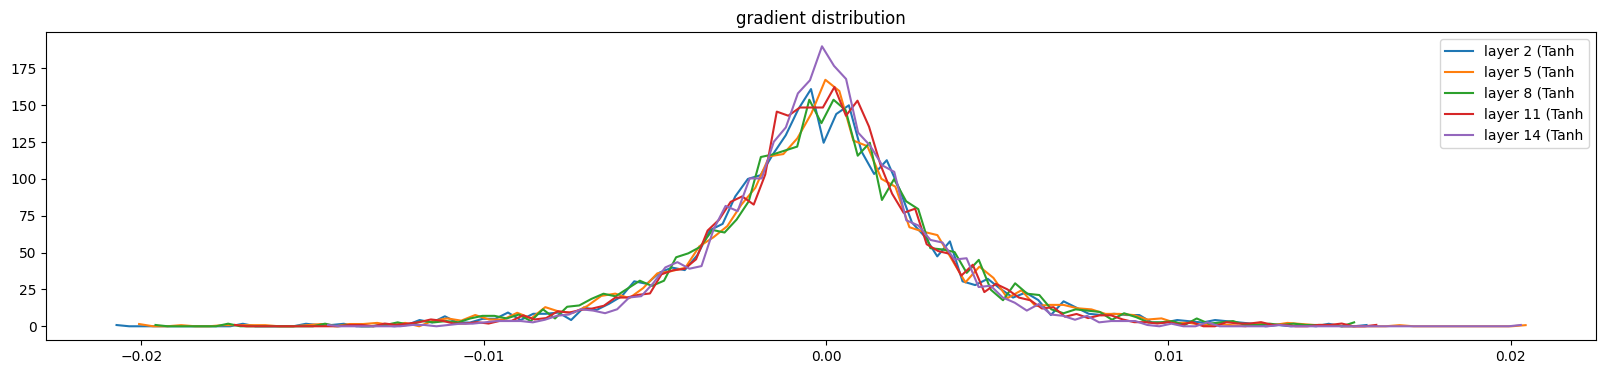

In [470]:
# visualize histograms
plt.figure(figsize=(20, 4)) # width and height of the plot
legends = []
for i, layer in enumerate(layers[:-1]): # note: exclude the output layer
  if isinstance(layer, Tanh):
    t = layer.out.grad
    print('layer %d (%10s): mean %+f, std %e' % (i, layer.__class__.__name__, t.mean(), t.std()))
    hy, hx = torch.histogram(t, density=True)
    plt.plot(hx[:-1].detach(), hy.detach())
    legends.append(f'layer {i} ({layer.__class__.__name__}')
plt.legend(legends);
plt.title('gradient distribution')

weight   (27, 10) | mean -0.000000 | std 1.615140e-02 | grad:data ratio 1.541290e-02
weight  (30, 100) | mean -0.000187 | std 1.020263e-02 | grad:data ratio 3.287411e-02
weight (100, 100) | mean +0.000006 | std 6.393429e-03 | grad:data ratio 3.457769e-02
weight (100, 100) | mean +0.000072 | std 6.758296e-03 | grad:data ratio 3.745363e-02
weight (100, 100) | mean -0.000061 | std 6.479450e-03 | grad:data ratio 3.727430e-02
weight (100, 100) | mean +0.000022 | std 5.799160e-03 | grad:data ratio 3.509120e-02
weight  (100, 27) | mean +0.000024 | std 8.069668e-03 | grad:data ratio 3.094527e-02


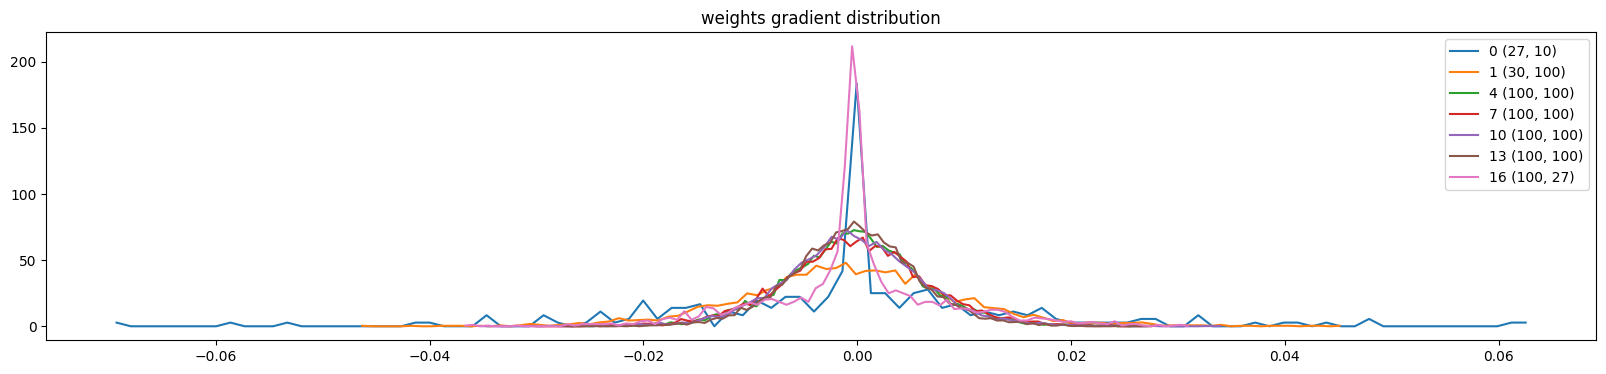

In [471]:
# visualize histograms
plt.figure(figsize=(20, 4)) # width and height of the plot
legends = []
for i,p in enumerate(parameters):
  p_gradients = p.grad
  if p.ndim == 2:
    print('weight %10s | mean %+f | std %e | grad:data ratio %e' % (tuple(p.shape), p_gradients.mean(), p_gradients.std(), p_gradients.std() / p.std()))
    hy, hx = torch.histogram(p_gradients, density=True)
    plt.plot(hx[:-1].detach(), hy.detach())
    legends.append(f'{i} {tuple(p.shape)}')
plt.legend(legends)
plt.title('weights gradient distribution');

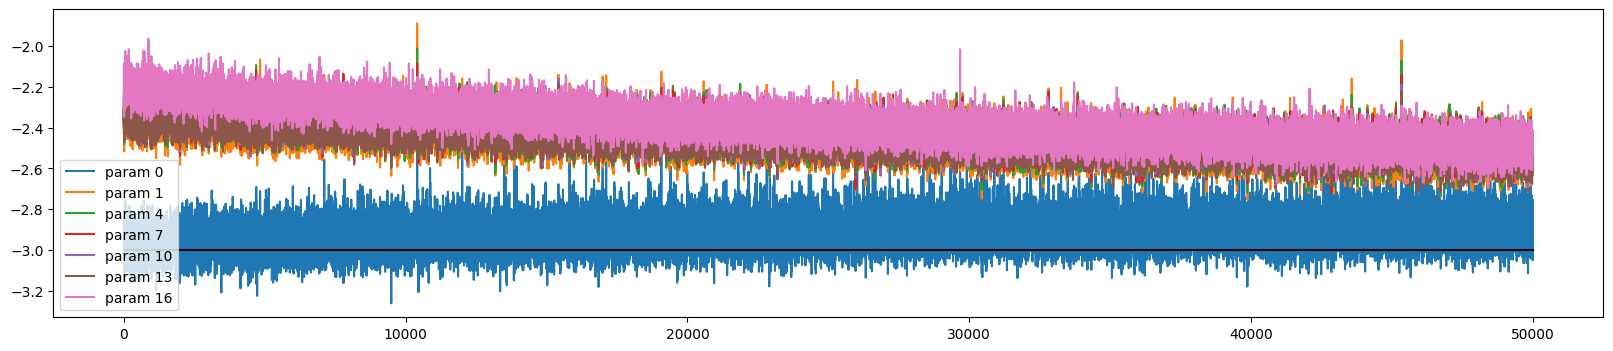

In [472]:
plt.figure(figsize=(20, 4))
legends = []
for i,p in enumerate(parameters):
  if p.ndim == 2:
    plt.plot([ud[j][i] for j in range(len(ud))])
    legends.append('param %d' % i)
plt.plot([0, len(ud)], [-3, -3], 'k') # these ratios should be ~1e-3, indicate on plot
plt.legend(legends);


In [473]:
@torch.no_grad() # this decorator disables gradient tracking
def split_loss(split):
  x,y = {
    'train': (X_train, y_train),
    'val': (X_test, y_test),
  }[split]
  emb = C[x] # (N, block_size, n_embd)
  x = emb.view(emb.shape[0], -1) # concat into (N, block_size * n_embd)
  for layer in layers:
    x = layer(x)
  loss = F.cross_entropy(x, y)
  print(split, loss.item())

# put layers into eval mode
for layer in layers:
  layer.training = False
split_loss('train')
split_loss('val')

# train 2.418604850769043
# val 2.431842565536499

train 2.080120325088501
val 2.138594150543213


In [474]:

# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      # forward pass the neural net
      emb = C[torch.tensor([context])] # (1,block_size,n_embd)
      x = emb.view(emb.shape[0], -1) # concatenate the vectors
      for layer in layers:
        x = layer(x)
      logits = x

      probs = F.softmax(logits, dim=1)
      # sample from the distribution
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      # shift the context window and track the samples
      context = context[1:] + [ix]
      out.append(ix)
      # if we sample the special '.' token, break
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out)) # decode and print the generated word



carlah.
amelle.
khi.
mrix.
tatyanna.
sane.
rahnel.
deliah.
jareeigh.
kasiah.
maiiv.
kaleigh.
ham.
join.
quinn.
sulin.
alianni.
waterri.
jarisia.
kaeliinsleen.


In [441]:
probs

tensor([[0.0472, 0.0453, 0.0319, 0.0379, 0.0354, 0.0410, 0.0346, 0.0314, 0.0333,
         0.0334, 0.0381, 0.0404, 0.0348, 0.0411, 0.0386, 0.0358, 0.0357, 0.0353,
         0.0351, 0.0371, 0.0321, 0.0348, 0.0351, 0.0364, 0.0387, 0.0403, 0.0391]],
       grad_fn=<SoftmaxBackward0>)

In [422]:
for layer in layers:
    print(layer)